In [41]:
# Задание 1. Выберите произвольное начальное состояние ("sunny", "cloudy" или "rainy") 
#Cмоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. 
#Результат моделирования (массив размера 20000) запишите в переменную states.
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import matrix_power 

state_wheather = ("sunny", "cloudy", "rainy")
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
states = []
states.append("sunny")
for i in range(1,20001):
    if states[i-1] == "sunny":
      elem = np.random.choice(state_wheather, size=1, p=transition_matrix[0])
      states.append(elem[0])
    if states[i-1] == "cloudy":
      elem = np.random.choice(state_wheather, size=1, p=transition_matrix[1])
      states.append(elem[0])
    if states[i-1] == "rainy":
      elem = np.random.choice(state_wheather, size=1, p=transition_matrix[2])
      states.append(elem[0])
print(states)

['sunny', 'cloudy', 'cloudy', 'rainy', 'sunny', 'rainy', 'cloudy', 'sunny', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'cloudy', 'sunny', 'cloudy', 'rainy', 'rainy', 'cloudy', 'rainy', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'rainy', 'sunny', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny',

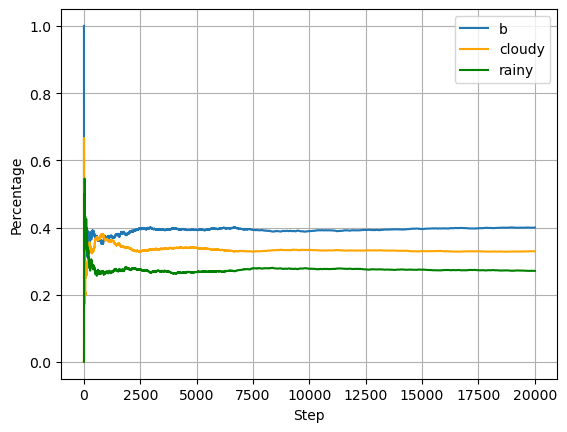

In [42]:
# Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. 
#На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. 

s=[[],[],[]]
count=[0,0,0]
for h in range(1,20001):
    for i in range(3):
        if states[h-1]==state_wheather[i]:
            count[i]+=1
        s[i].append(count[i])

plt.plot(np.arange(1, 20001, step=1), s[0]/np.arange(1, 20001, step=1) , label='b')
plt.plot(np.arange(1, 20001, step=1), s[1]/np.arange(1, 20001, step=1), label='cloudy', c='orange')
plt.plot(np.arange(1, 20001, step=1), s[2]/np.arange(1, 20001, step=1), label='rainy', c='g')
plt.xlabel('Step', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.grid()
plt.legend()
plt.show()


In [44]:
#Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. 
#Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей, а вектор π - искомая стационарная плотность. 
#Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

id = np.eye(3)
sm = (identity_matrix - transition_matrix).transpose()

vector = ([[0],[0],[1]])
sm[2] = [1,1,1]
stat = np.linalg.solve(sm, vector)
print(np.linalg.matrix_power(transition_matrix, 50)[0])
print(stat)
print(s[0][19999]/20000)
print(s[1][19999]/20000)
print(s[2][19999]/20000)

[0.38888889 0.33333333 0.27777778]
[[0.38888889]
 [0.33333333]
 [0.27777778]]
0.4
0.32915
0.27085


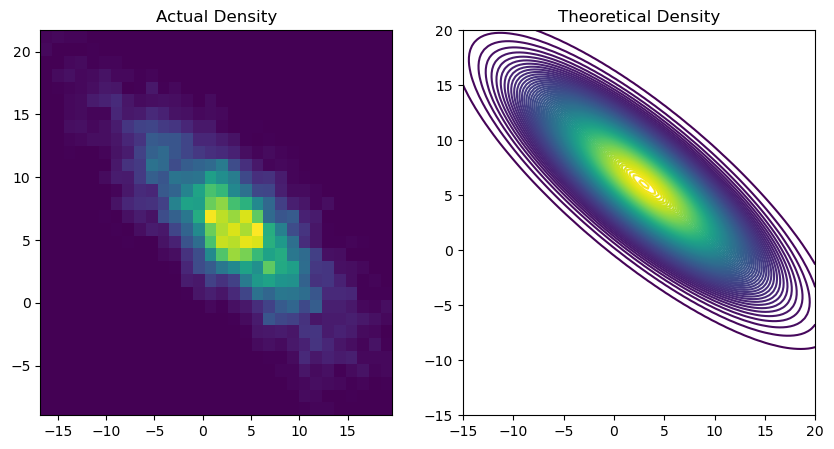

In [56]:
# Задание 5. Методом Метрополиса — Гастингса постройте выборку из двумерного гауссовского распределения 
#со средним (3, 6) и ковариационной матрицей B = [[40, -26], [-26, 25]]. 
#Сравните плоность по выборке (двумерную гистограмму) и теоретическую плотность.


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def metropolis(m, B, n):
    d = len(m)
    x = np.zeros((n, d))
    x_cur = np.random.randn(d)
    acc = 0
    for i in range(n):
        x_next = x_cur + np.random.randn(d)
        alpha = min(1, np.exp(-0.5 * (np.dot(x_next - m, np.linalg.solve(B, x_next - m)) -
                                      np.dot(x_cur - m, np.linalg.solve(B, x_cur - m)))))
        if np.random.rand() < alpha:
            x_cur = x_next
            acc += 1
        x[i, :] = x_cur
    return x, acc / n

m = np.array([3, 6])
B = np.array([[40, -26], [-26, 25]])
n = 10000
sample, acc_rate = metropolis(m, B, n)

x, y = np.meshgrid(np.linspace(-15, 20, 100), np.linspace(-15, 20, 100))
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

rv = multivariate_normal(m, B)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist2d(sample[:, 0], sample[:, 1], bins=30, density=True)
plt.title('Actual Density')

plt.subplot(122)
plt.contour(x, y, rv.pdf(pos),levels=100)
plt.title('Theoretical Density')

plt.show()

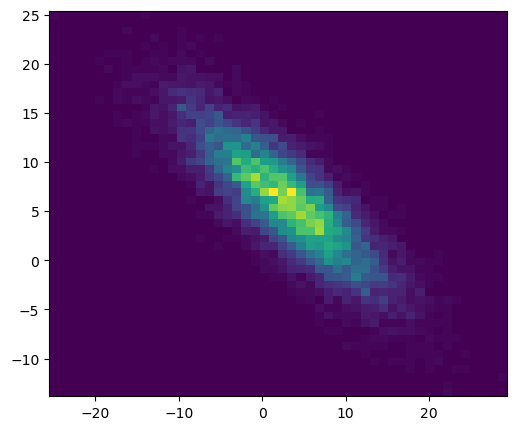

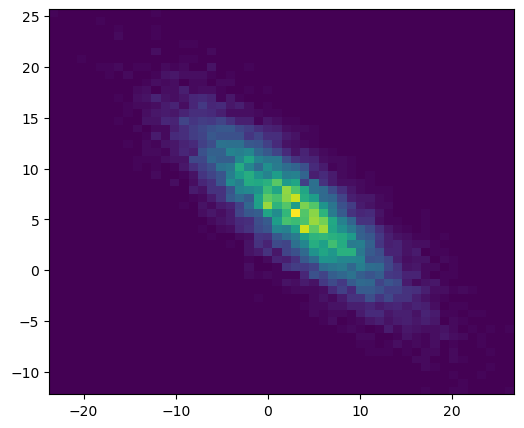

In [65]:
#Задание 6. Решите задачу 5 методом cэмплирования по Гиббсу
mean = np.array([3, 6])
m= ([[3],[6]])
cov = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(cov)

def gibbs(n, t):
    samp = []
    samp.append(n)
    for i in range (1,t):
        y = np.random.normal(6 - (26/40)*(samp[i-1][0]-3), np.sqrt(25 - 26**2/40))
        x = np.random.normal(3 - (26/25)*(y-6), np.sqrt(40 - 26**2/25))
        tmp = [x, y]
        samp.append(tmp)
    return samp

g = gibbs([0,0],10000)
s = A @ np.random.randn(2, 10000)+ m
samples = np.array(g)

plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.hist2d(samples[:, 0], samples[:, 1], bins=50)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
h, x, y, _ = ax.hist2d(*s, bins=50)
plt.show()
